# 1‑Qubit SSE: Continuous σ_z Measurement
This notebook reproduces single‑qubit trajectories using a Stochastic Schrödinger Equation (SSE) with symmetric midpoint evaluation for the observable‐weighted increment of an additive functional $Q$. You can tweak `gamma`, `T`, `N`, and the initial state.

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from sse_qubit import run_trajectory, run_ensemble, map_epsilon_to_gamma
from qubit_measurement_simulation import eq14_pdf

In [28]:
# Parameters
T = 1.0
N = 10000
gamma = 2.0  # measurement rate
num_traj = 200
seed = 12345


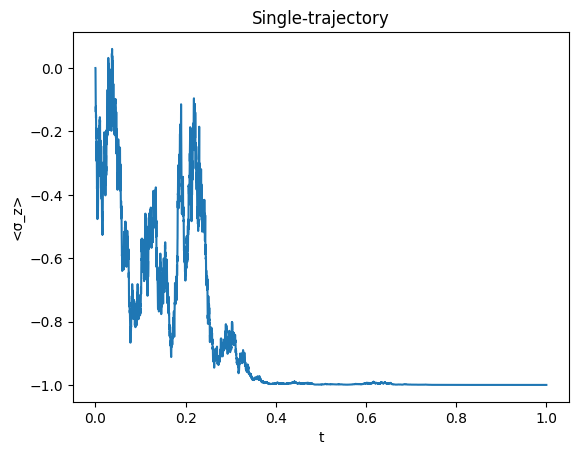

In [29]:
# Single trajectory demo
out = run_trajectory(T=T, N=N, gamma=gamma, omega=0.0, midpoint_Q=True)
plt.figure()
plt.plot(out['t'], out['m'])
plt.xlabel('t')
plt.ylabel('<σ_z>')
plt.title('Single‑trajectory')
plt.show()

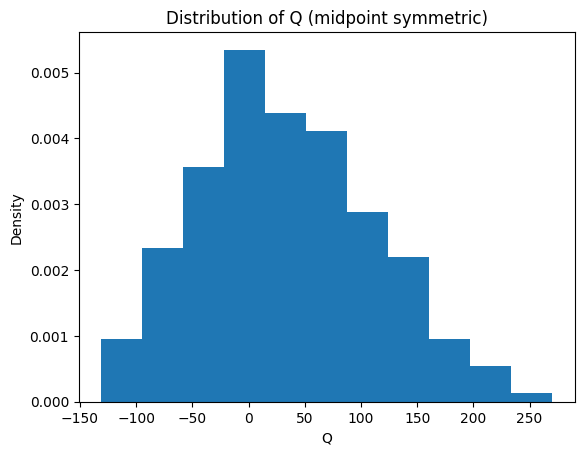

In [30]:
# Ensemble for Q distribution
Qs, ms = run_ensemble(num_traj=num_traj, T=T, N=N, gamma=gamma, seed=seed)
plt.figure()
plt.hist(Qs, bins='auto', density=True)
plt.xlabel('Q')
plt.ylabel('Density')
plt.title('Distribution of Q (midpoint symmetric)')
plt.show()

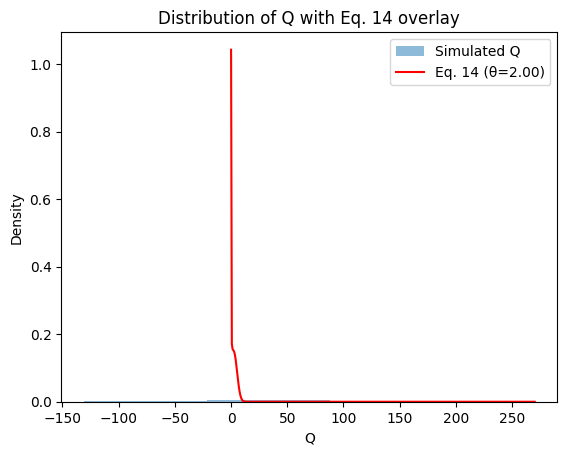

In [31]:
# Overlay Eq. 14 PDF on the Q histogram (no fit, just plot)
import numpy as np

# Set theta manually (example: theta = gamma * T)
theta = gamma * T

plt.figure()
plt.hist(Qs, bins='auto', density=True, alpha=0.5, label='Simulated Q')
x = np.linspace(0.01, max(Qs), 400)
plt.plot(x, eq14_pdf(x, theta), 'r-', label=f'Eq. 14 (θ={theta:.2f})')
plt.xlabel('Q')
plt.ylabel('Density')
plt.title('Distribution of Q with Eq. 14 overlay')
plt.legend()
plt.show()
